In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#Get the ISO-Codes
iso = pd.read_csv("../Data/ISO/ISO.csv")

In [7]:
# --- : Load DataFrames from CSV ---
print("\nLoading W_ij Dataframes from CSV files...")
W_ij_dataframes = {}
csv_filenames = ['../Data/Networks/W_1_ij.csv', '../Data/Networks/W_2_ij.csv', '../Data/Networks/W_3_ij.csv']
for filename in csv_filenames:
    try:
        df_reloaded = pd.read_csv(filename)
        base_name = os.path.basename(filename) # Gets 'W_1_ij.csv'
        parts = base_name.split('_') # Splits into ['W', '1', 'ij.csv']
        
        # Check if the parts list has at least 2 elements and the second part is a number
        if len(parts) >= 2 and parts[1].isdigit():
            df_number = parts[1]
            new_df_name = f"W_{df_number}_ij"
        else:
            # Fallback if filename format is unexpected, or use the full name as before
            new_df_name = os.path.splitext(base_name)[0] 
            
        W_ij_dataframes[new_df_name] = df_reloaded
        print(f"Loaded {filename} as {new_df_name}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")


Loading W_ij Dataframes from CSV files...
Loaded ../Data/Networks/W_1_ij.csv as W_1_ij
Loaded ../Data/Networks/W_2_ij.csv as W_2_ij
Loaded ../Data/Networks/W_3_ij.csv as W_3_ij


In [8]:
# Define the desired start and end periods for filtering
start_period = 1989 
end_period = 2020  

print(f"\nFiltering DataFrames for periods between {start_period} and {end_period}...")
# Iterate through the dictionary and filter dataframes in-place
for df_name, df_content in W_ij_dataframes.items():
    if not df_content.empty and 'period' in df_content.columns:
        # Apply the period filter directly to the DataFrame in the dictionary
        original_rows = len(df_content)
        W_ij_dataframes[df_name] = df_content[(df_content['period'] >= start_period) & (df_content['period'] <= end_period)]
        print(f"Filtered {df_name}. Original rows: {original_rows}, Filtered rows: {len(W_ij_dataframes[df_name])}")
    else:
        print(f"Skipping filtering for {df_name}: DataFrame is empty or 'period' column is missing.")



Filtering DataFrames for periods between 1989 and 2020...
Filtered W_1_ij. Original rows: 81353, Filtered rows: 69127
Filtered W_2_ij. Original rows: 34585, Filtered rows: 29382
Filtered W_3_ij. Original rows: 94775, Filtered rows: 78649


In [9]:
hhi_results = []

for df_name, df in W_ij_dataframes.items():
    # Calculate HHI per period
    df['share'] = df.groupby('period')['W_ij'].transform(lambda x: x / x.sum())
    df['share_squared'] = df['share']**2
    hhi_per_period = df.groupby('period')['share_squared'].sum().reset_index()
    hhi_per_period['DataFrame'] = df_name
    hhi_results.append(hhi_per_period)

# Combine all HHI results into a single DataFrame
final_hhi_df = pd.concat(hhi_results, ignore_index=True)

C:\Users\nilsl\AppData\Local\Temp\ipykernel_38468\4031978221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['share'] = df.groupby('period')['W_ij'].transform(lambda x: x / x.sum())
C:\Users\nilsl\AppData\Local\Temp\ipykernel_38468\4031978221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['share_squared'] = df['share']**2



Saving plot to ../../Writing/Master/figures/HHI_plot.png with 300 DPI...
Plot saved successfully!


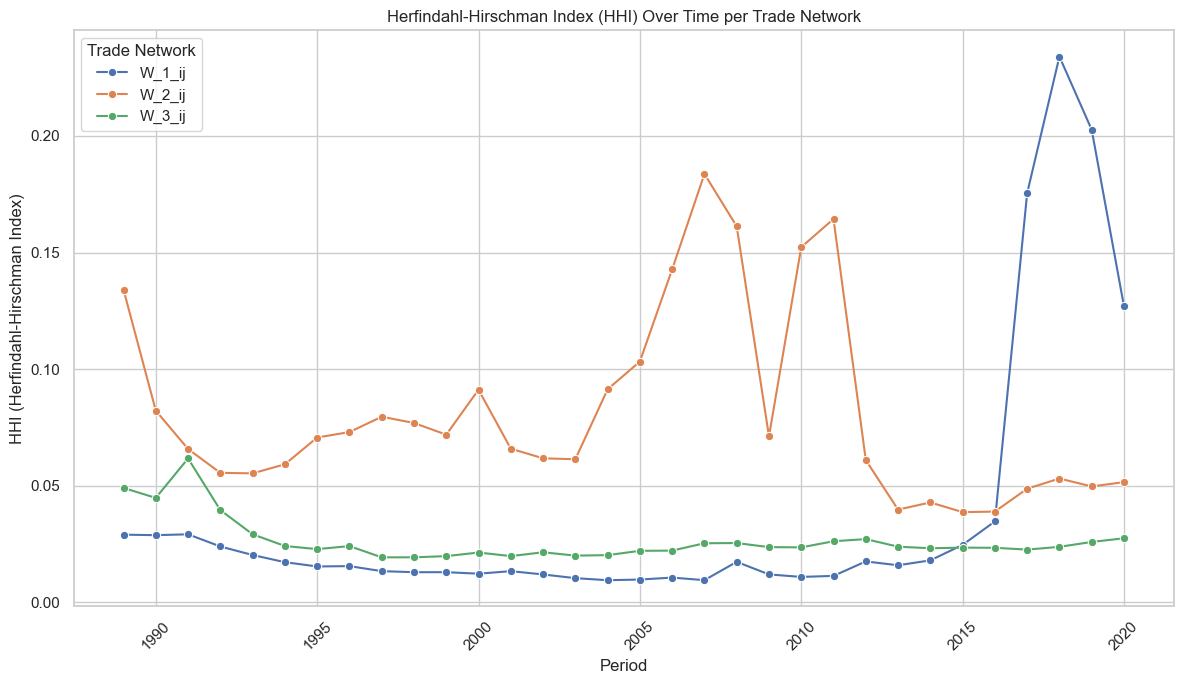

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Use 'hue' to plot separate lines for each 'DataFrame' category
sns.lineplot(
    data=final_hhi_df,
    x='period',
    y='share_squared',
    hue='DataFrame',  # This creates separate lines for each unique value in 'DataFrame'
    marker='o'
)

plt.xlabel('Period')
plt.ylabel('HHI (Herfindahl-Hirschman Index)') # Corrected label
plt.title('Herfindahl-Hirschman Index (HHI) Over Time per Trade Network') # Added a title
plt.legend(title='Trade Network')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping 

output_filename = '../../Writing/Master/figures/HHI_plot.png'
output_dpi = 300 # Dots per inch (higher DPI means better quality)

print(f"\nSaving plot to {output_filename} with {output_dpi} DPI...")
try:
    plt.savefig(output_filename, dpi=output_dpi, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Error saving plot: {e}")


plt.show()